In [18]:
#Import the dataset -file attached

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/content/Social_Network_Ads.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [58]:
#Extract X and Y.

x=df[['Age','EstimatedSalary']]
y=df['Purchased']


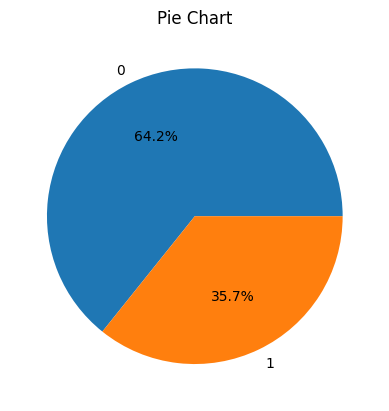

In [59]:
#Visualize the dataset.

plt.pie(df['Purchased'].value_counts(), labels=df['Purchased'].unique(),autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

In [34]:
#Split the data into training set and testing set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [42]:
x_train

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [35]:
#do feature scaling using standardscalar
sc = StandardScaler()
sc.fit(x_train)

x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)


In [44]:
# Train a Logistic regression model and KNN classification model for the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

l_model = LogisticRegression()
l_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [54]:
# Predict with the Logistic Regression model and knn model
logistic_predictions = l_model.predict(x_test_scaled)
knn_predictions = knn_model.predict(x_test_scaled)


In [55]:
#Display the coefficients and form the logistic regression equation
coefficients = l_model.coef_
intercept = l_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[1.96521717 1.13508276]]
Intercept: [-0.99506471]


In [56]:
# Compute the accuracy and confusion matrix for both models.
from sklearn.metrics import accuracy_score, confusion_matrix

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

logistic_cm = confusion_matrix(y_test, logistic_predictions)
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)



Logistic Regression Accuracy: 0.8625
Logistic Regression Confusion Matrix:
[[50  2]
 [ 9 19]]


In [57]:
# accuracy for KNN classification model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Classification Accuracy:", knn_accuracy)

knn_cm = confusion_matrix(y_test, knn_predictions)
print("KNN Classification Confusion Matrix:")
print(knn_cm)


KNN Classification Accuracy: 0.9125
KNN Classification Confusion Matrix:
[[48  4]
 [ 3 25]]
